In [27]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
interpreter_fp16 = tf.lite.Interpreter(model_path="./models/danelion-v1-f16.tflite")
interpreter_fp16.allocate_tensors()

In [7]:
input_index = interpreter_fp16.get_input_details()[0]["index"]
output_index = interpreter_fp16.get_output_details()[0]["index"]

In [10]:
input_index, output_index

(0, 39)

In [39]:
frame = (cv2.imread("./img_2022-05-31t18_40_01.625698.jpg") / 255).astype(np.float32)[np.newaxis,:,:,::-1]

In [40]:
frame.shape

(1, 480, 640, 3)

In [41]:
interpreter_fp16.set_tensor(input_index, frame)
interpreter_fp16.invoke()
predictions = interpreter_fp16.get_tensor(output_index)

In [42]:
def ishow(img):
    plt.figure(figsize=(19,19))
    plt.imshow(img)
    plt.show()

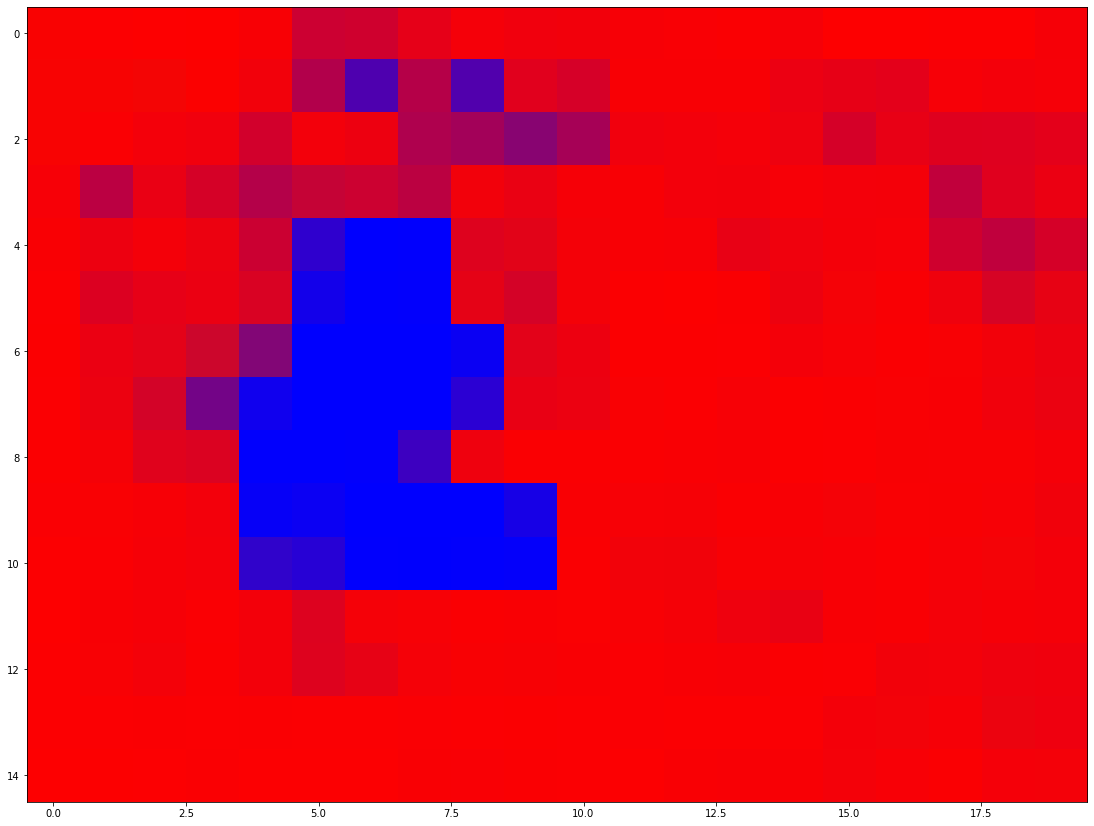

In [43]:
ishow(predictions[0])

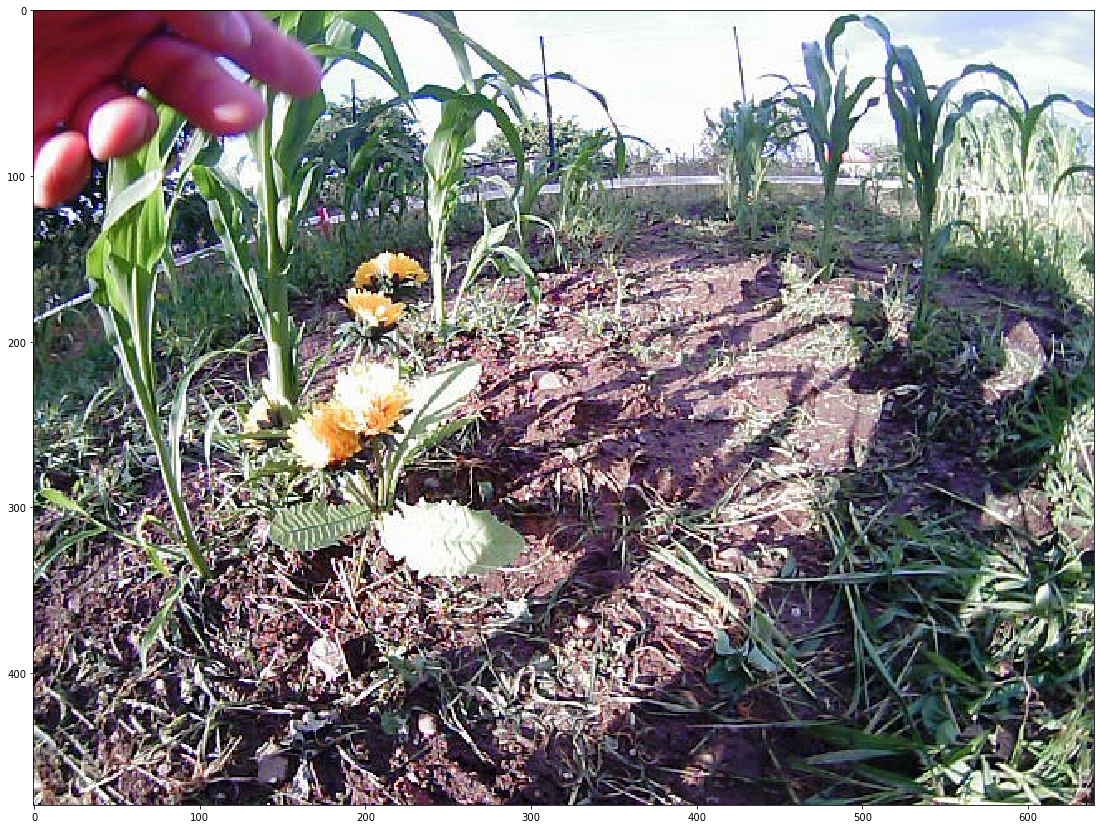

In [44]:
ishow(frame[0])